In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [4]:
# Importing Data
airline_data=pd.read_excel('Airlines+Data.xlsx')
airline_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


# Data Understanding

In [7]:
airline_data.shape

(96, 2)

In [8]:
airline_data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
airline_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

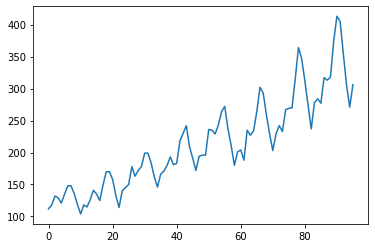

In [10]:
airline_data.Passengers.plot()

In [11]:
Train = airline_data.head(84)
Test = airline_data.tail(12)

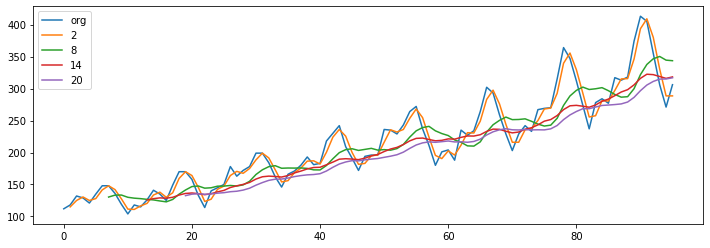

In [12]:
plt.figure(figsize=(12,4))
airline_data.Passengers.plot(label="org")
for i in range(2,24,6):
    airline_data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time Seriers And Decomposition Plot

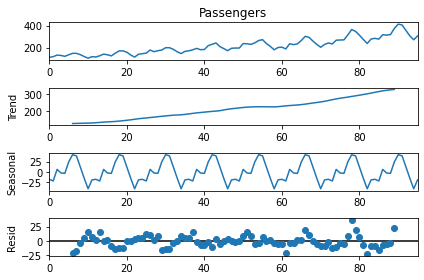

In [13]:
decompose_ts_add = seasonal_decompose(airline_data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# ACF And PACF Plots

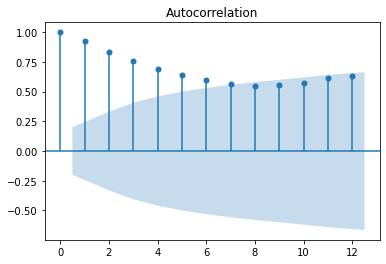

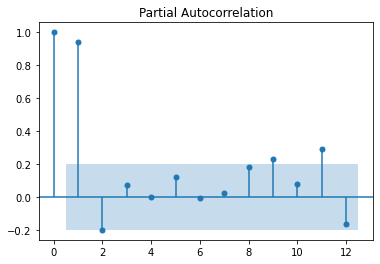

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline_data.Passengers,lags=12)
tsa_plots.plot_pacf(airline_data.Passengers,lags=12)
plt.show()


# Using MAPE Metrics For Evaluation

In [15]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [16]:
# SimpleExponentialMethod
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.41127474051367

In [33]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

23.530719652100505

In [34]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.499409350958871

In [35]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.820815894720633

In [37]:
# Final Model
hwe_model_add_add = ExponentialSmoothing(airline_data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [38]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     319.235281
97     311.528396
98     350.278697
99     346.984962
100    351.845000
101    403.925721
102    440.566848
103    427.446585
104    376.628288
105    329.767602
dtype: float64

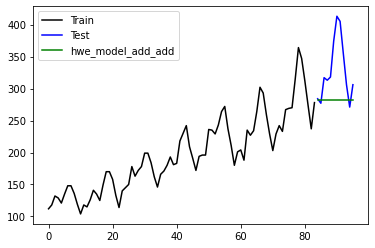

In [39]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(Test.index, Test["Passengers"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='hwe_model_add_add',color="green")
plt.legend(loc='best')